In [6]:
import emcee

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import time

class MetropolisHastings:
    def __init__(self, target_distr, initial_state=None, seed=None):
        """
        Initialize the Metropolis-Hastings sampler.
        
        Parameters:
        - target_distr: function
            The target distribution from which we want to sample.
        - initial_state: array-like, optional
            The initial state of the Markov chain. Default is a zero vector.
        - seed: int, optional
            Random seed for reproducibility. Default is None.
        """
        self.target_distr = target_distr
        self.dim = len(initial_state) if initial_state is not None else 1
        self.initial_state = np.array(initial_state) if initial_state is not None else np.zeros(self.dim)
        self.seed = seed
        self.samples = []
        self.acceptance_rate = 0.0
        self.mean = None
        self.covariance = None
        self.time = 0.0
        
        if seed is not None:
            np.random.seed(seed)
    
    def sample(self, n_samples):
        """
        Generate samples using the Metropolis-Hastings algorithm.
        
        Parameters:
        - n_samples: int
            The number of samples to generate.
        
        Returns:
        - samples: np.array
            Array of generated samples.
        """
        start_time = time.time()
        
        proposal_distr = scipy.stats.multivariate_normal
        # Random covariance matrix for the proposal distribution
        A = np.random.rand(self.dim, self.dim)
        cov = np.dot(A, A.T)
        
        x_t = self.initial_state
        samples = []
        accept_count = 0
        
        while len(samples) < n_samples:
            x_prime = proposal_distr.rvs(mean=x_t, cov=cov)
            acceptance_ratio = (self.target_distr(x_prime) * proposal_distr.pdf(x_t, mean=x_prime, cov=cov)) / \
                               (self.target_distr(x_t) * proposal_distr.pdf(x_prime, mean=x_t, cov=cov))
            
            acceptance_ratio = min(1, acceptance_ratio)
            if np.random.uniform(0, 1) < acceptance_ratio:
                x_t = x_prime
                samples.append(x_t)
                accept_count += 1
            else:
                samples.append(x_t)
        
        self.samples = np.array(samples)
        self.acceptance_rate = accept_count / n_samples
        self.mean = np.mean(self.samples, axis=0)
        self.covariance = np.cov(self.samples.T)
        
        self.time = time.time() - start_time
        
        return self.samples

In [9]:
mh_sampler.time

2.419640064239502

In [15]:
from emcee.moves import MHMove

# Define the true mean and covariance for the 11-dimensional Gaussian
true_mean = np.zeros(11)
true_cov = np.eye(11)  # Identity matrix as covariance

# Define the target distribution function
def target_distr(x):
    return scipy.stats.multivariate_normal(mean=true_mean, cov=true_cov).pdf(x)

# Initialize the Metropolis-Hastings sampler
mh_sampler = MetropolisHastings(target_distr=target_distr, initial_state=np.zeros(11), seed=42)
mh_samples = mh_sampler.sample(10000)

# Print the mean and covariance estimated by Metropolis-Hastings
print("Metropolis-Hastings Mean:\n", mh_sampler.mean)
print("Metropolis-Hastings Covariance:\n", mh_sampler.covariance)

# Initialize the Metropolis-Hastings sampler
mh_sampler = MetropolisHastings(target_distr=target_distr, initial_state=np.zeros(11), seed=42)
mh_samples = mh_sampler.sample(10000)

# Print the mean and covariance estimated by Metropolis-Hastings
print("Metropolis-Hastings Mean:\n", mh_sampler.mean)
print("Metropolis-Hastings Covariance:\n", mh_sampler.covariance)

# Define the log probability function for emcee
def log_prob(x):
    return np.log(target_distr(x))

# Initialize the Metropolis-Hastings sampler
mh_sampler = MetropolisHastings(target_distr=target_distr, initial_state=np.zeros(11), seed=42)
mh_samples = mh_sampler.sample(10000)

# Print the mean and covariance estimated by Metropolis-Hastings
print("Metropolis-Hastings Mean:\n", mh_sampler.mean)
print("Metropolis-Hastings Covariance:\n", mh_sampler.covariance)

# Define the true mean and covariance for the target distribution
true_mean = np.zeros(ndim)
true_cov = np.eye(ndim)

# Define the target distribution
def target_distr(x):
    return scipy.stats.multivariate_normal(mean=true_mean, cov=true_cov).pdf(x)

# Define the log probability function for emcee
def log_prob(x):
    return np.log(target_distr(x))

# Define a proposal function for the MHMove
def proposal_function(position, random_state):
    nwalkers, ndim = position.shape
    proposal = position + 0.1 * random_state.randn(nwalkers, ndim)  # Simple Gaussian proposal
    return proposal, 0  # The second value is the logarithm of the acceptance probability ratio (not used here)

# Initialize the walkers
nwalkers = 10
ndim = 5
nsteps = 10000
initial_positions = np.random.rand(nwalkers, ndim)

# Set up the sampler with the MHMove and the proposal function
moves = MHMove(proposal_function)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, moves=moves)
sampler.run_mcmc(initial_positions, nsteps)

# Get the samples from the emcee sampler
emcee_samples = sampler.get_chain(flat=True)

# Print the mean and covariance estimated by emcee
print("emcee Mean:\n", np.mean(emcee_samples, axis=0))
print("emcee Covariance:\n", np.cov(emcee_samples, rowvar=False))

# Print the true mean and covariance
print("True Mean:\n", true_mean)
print("True Covariance:\n", true_cov)

Metropolis-Hastings Mean:
 [-0.1260418   0.21491756 -0.34513941 -0.09328139 -0.0188139  -0.14479388
  0.36698198 -0.49225039  0.06852211 -0.17544672  0.48904296]
Metropolis-Hastings Covariance:
 [[ 1.01849373  0.09656926  0.08844295 -0.06479121  0.11243986 -0.04546604
   0.02781775 -0.08190013 -0.1695272   0.01395003  0.05536088]
 [ 0.09656926  0.60082284 -0.07000666  0.06367828  0.01551438  0.03524322
  -0.18484585  0.09820924  0.19802685 -0.04709906 -0.10677527]
 [ 0.08844295 -0.07000666  0.98493256 -0.00418638 -0.02380501 -0.1302352
   0.03325687 -0.04507815  0.1359716  -0.06257436  0.16963536]
 [-0.06479121  0.06367828 -0.00418638  0.87316515  0.02816196  0.04667738
   0.13496196 -0.07887649 -0.09412446  0.0127171   0.11297371]
 [ 0.11243986  0.01551438 -0.02380501  0.02816196  0.86165251 -0.11404901
   0.08566747 -0.20944717 -0.12914816  0.02327722  0.12610025]
 [-0.04546604  0.03524322 -0.1302352   0.04667738 -0.11404901  0.94088031
   0.04717639 -0.01459212  0.07933502 -0.020178

In [7]:
mh_sampler.time

3.0228779315948486

emcee Time:
 0.044497013092041016


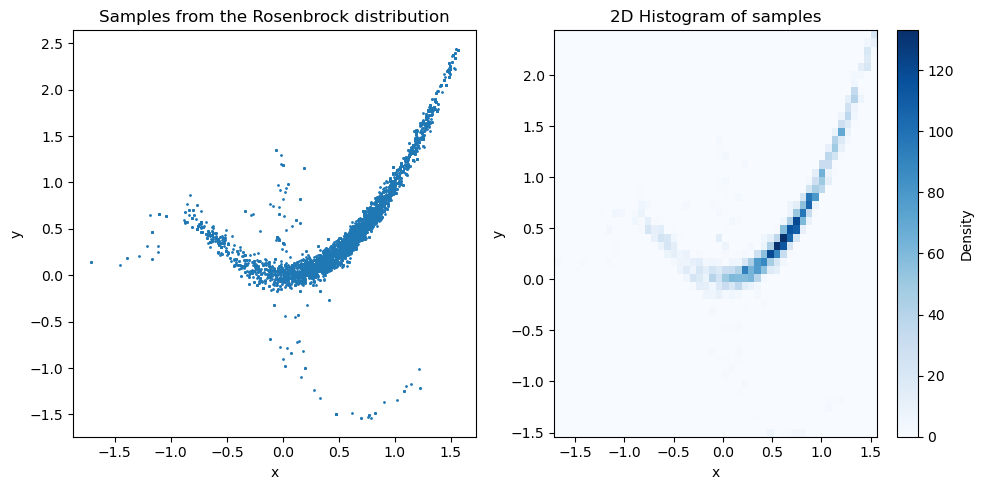

In [16]:
import numpy as np
import emcee
import time
import matplotlib.pyplot as plt
from emcee.moves import MHMove

# Define the Rosenbrock function as a log probability function
def log_prob(x, a=1, b=100):
    if not np.isfinite(x).all():
        return -np.inf
    return -( (a - x[0])**2 + b*(x[1] - x[0]**2)**2 )

# Define a proposal function for the MHMove
def proposal_function(position, random_state):
    nwalkers, ndim = position.shape
    proposal = position + 0.1 * random_state.randn(nwalkers, ndim)  # Simple Gaussian proposal
    return proposal, 0  # The second value is the logarithm of the acceptance probability ratio (not used here)

# Set up the emcee sampler
nwalkers = 10
ndim = 2
nsteps = 500

# Initialize the walkers in a small Gaussian ball around the origin
initial_positions = np.random.randn(nwalkers, ndim)

# Set up the sampler with the MHMove and the proposal function
moves = MHMove(proposal_function)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, moves=moves)

# Measure the time taken by emcee to sample
start_time = time.time()
sampler.run_mcmc(initial_positions, nsteps)
emcee_time = time.time() - start_time

# Get the samples from the emcee sampler
emcee_samples = sampler.get_chain(flat=True)

# Print the time taken by emcee
print("emcee Time:\n", emcee_time)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(emcee_samples[:, 0], emcee_samples[:, 1], 'o', markersize=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from the Rosenbrock distribution')

plt.subplot(1, 2, 2)
plt.hist2d(emcee_samples[:, 0], emcee_samples[:, 1], bins=50, cmap='Blues')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Density')
plt.title('2D Histogram of samples')

plt.tight_layout()
plt.show()


Metropolis-Hastings Time:
 1.1288321018218994


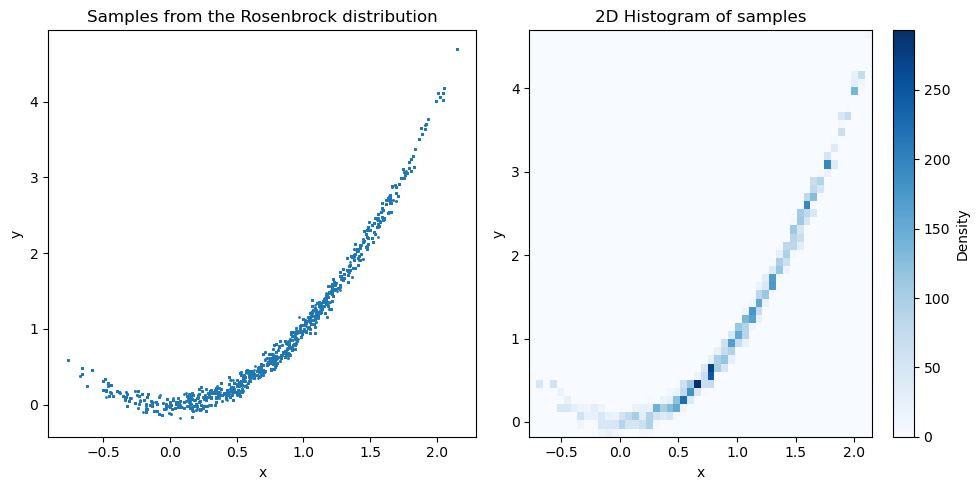

In [19]:
# Define the Rosenbrock function as a log probability function
def rosenbrock(x, a=1, b=100):
    if not np.isfinite(x).all():
        return 0
    return np.exp(-( (a - x[0])**2 + b*(x[1] - x[0]**2)**2 ))

initial_state = np.array([0.0, 0.0])
mh_sampler = MetropolisHastings(target_distr=rosenbrock, initial_state=initial_state, seed=42)

# Generate samples
n_samples = 10000
mh_samples = mh_sampler.sample(n_samples)

# Print the time taken by Metropolis-Hastings
print("Metropolis-Hastings Time:\n", mh_sampler.time)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(mh_samples[:, 0], mh_samples[:, 1], 'o', markersize=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from the Rosenbrock distribution')

plt.subplot(1, 2, 2)
plt.hist2d(mh_samples[:, 0], mh_samples[:, 1], bins=50, cmap='Blues')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Density')
plt.title('2D Histogram of samples')

plt.tight_layout()
plt.show()